In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


Бельгийские психологи воплотили дилемму в реальную жизнь. Участники эксперимента должны были выбрать, ударить током пять мышей или одну мышь. Эксперимент проходил следующим образом. Участника сажали перед двумя клетками, в одной из которых сидели пять мышей, а в другой — одна. Перед клетками стоял ноутбук с 20-секундным таймером: участникам сообщили, что по истечении этих 20

секунд в клетку с пятью мышами пустят ток, и мыши получат не смертельный, но очень болезненный удар. Пока время идет, участник может нажать на кнопку: в этом случае ток пустят по клетке с одной мышью. В исследовании использовали живых мышей.

Удары тока были ненастоящими: сразу же после «удара» участников сопроводили в отдельную комнату, где разъяснили им, что мыши в полном порядке и током их не били (об этом заранее догадались только 12
участников). В решении реальной проблемы вагонетки приняли участие 192 человека, а еще 83

решали такую же задачку, но гипотетическую (на бумаге). Все участники также прошли онлайн-опросы, в ходе которых учёные собрали о респондентах кучу дополнительной информации.

В файле mouse.csv лежит информация о том, как прошёл эксперимент. Нас будут интересовать столбцы:

В файле `mouse.csv` лежит информация о том, как прошёл эксперимент. Нас будут интересовать столбцы: 

* __STUDY:__ какую проблему вагонетки решал человек $1$ если реальную, $2$ если на бумаге
* __AGE:__ возраст респондента 
* __GENDER:__ пол респондента
* __DECISION:__ решение дилеммы ($1$ - жать на кнопу, $0$ - не жать) 
* __RT:__ время, которое респондент потратил, чтобы нажать на кнопку 




In [9]:
df = pd.read_csv('./data/mouse.csv', sep = '\t')

In [10]:
df.head()

,STUDY,AGE,GENDER,DECISION,DEO1,DEO2,DEO3,DEO4,DEO5,DEO6,...,AE,MOUSE1,MOUSE2,MOUSE3,MOUSE,DOUBT,OTHERCHOICE,UNCOMFORTABLE,NOSHOCK,RT
0,1,38,1,NaN,2,2,2,1,2,2,...,5.000000,6.0,5.0,5.0,5.333333,NaN,NaN,NaN,NaN,NaN
1,1,22,1,NaN,1,2,2,1,2,1,...,5.727273,5.0,6.0,6.0,5.666667,NaN,NaN,NaN,NaN,NaN
2,1,39,1,NaN,1,1,3,5,3,1,...,5.545455,6.0,6.0,6.0,6.000000,NaN,NaN,NaN,NaN,NaN
3,1,21,0,1.0,2,3,3,3,3,2,...,5.136364,4.0,7.0,7.0,6.000000,2.0,0.0,6.0,80.0,9.212427
4,1,20,0,1.0,4,2,2,2,2,2,...,4.181818,4.0,6.0,6.0,5.333333,4.0,0.0,6.5,75.0,17.071711


In [11]:
df.dropna(subset=['DECISION'], inplace=True)

In [13]:
#1 Доля и нажатие на кнопку
paper = df[df['STUDY'] == 1].DECISION.values
real = df[df['STUDY'] == 2].DECISION.values
paper

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [14]:
real

array([0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.])

In [15]:
paper.mean(), real.mean()

(0.8645833333333334, 0.7469879518072289)

Проверка гипотезы о равенстве долей. Выборки независимые.

$H_0$ : $p_1$ = $p_2$ Люди жмут на кнопку одинакого часто

$H_1$ : $p_1$ != $p_2$ Есть различия

т.к. нет выбросов, много наблюдений. Наблюдения независимы. Можно использовать ЦПТ

In [19]:
alpha = 0.05
n1,n2 = len(paper), len(real)
m1,m2 = paper.sum(), real.sum()

p1, p2 = paper.mean(), real.mean()
diff = p1 - p2

P = (m1 + m2)/(n1 + n2)
diff_std = np.sqrt(P*(1 - P)*(1/n1 + 1/n2))

z_obs = diff/diff_std
z_crit = stats.norm.ppf(1 - alpha/2)

print(f'{z_obs:.3} не попадает в {-z_crit}, {z_crit} => нулевая гипотеза отвергается')

2.38 не попадает в -1.959963984540054, 1.959963984540054 => нулевая гипотеза отвергается


In [28]:
# из библиотеки
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05 # уровень значимости
n_obs = len(paper), len(real) # размер выборок
m_obs = paper.sum(), real.sum() # успехи

z_obs, p_val = proportions_ztest(m_obs, n_obs, value=0, alternative='larger')

print(f'Наблюдаемое значение: {z_obs:.3}, \np_value: {p_val:.3}')

Наблюдаемое значение: 2.38, 
p_value: 0.0087


In [29]:
#гипотеза о том, что на кнопку жмут одинакого часто - отвергается

# Среднее и дисперсия

Кровожадные люди быстро берут на себя ответственность за удар мышки током. Будем считать, что кровожадные люди принимают решение менее, чем за пять секунд. Правда ли, что люди по своей природе кровожадные? 

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu \le 5 \hspace{2mm} \text{Люди кровожадны} \\
&H_1: \hspace{2mm} \mu > 5  \hspace{2mm} \text{Люди не кровожадны}
\end{aligned}
$$

In [42]:
# Асимптотический тест
x = df['RT'].dropna().values

alpha = 0.05
n = x.size
mu = x.mean()
std = x.std(ddof=1)/np.sqrt(n)

z_obs = (mu - 5)/std
z_crit = stats.norm.ppf(1-alpha)

print(f'Наблюдаемое значение {z_obs:.10}, критическое значение {z_crit:.3} => нулевая гипотеза отвергается ')

Наблюдаемое значение 12.97489595, критическое значение 1.64 => нулевая гипотеза отвергается 


In [43]:
# С помощью библиотеки
from statsmodels.stats.weightstats import ztest

z_obs, p_val = ztest(x, value=5, alternative='larger')
print(f'Наблюдаемое значение {z_obs:.10}, p_value {p_val } => нулевая гипотеза отвергается ')

Наблюдаемое значение 12.97489595, p_value 8.491340383773086e-39 => нулевая гипотеза отвергается 


In [44]:
# Точный тест
t_obs = (mu - 5)/std
t_crit = stats.t(n-1).ppf(1-alpha)

print(f'Наблюдаемое значение {t_obs:.5}, больше критического {t_crit:.4} => нулевая гипотеза отвергается')

Наблюдаемое значение 12.975, больше критического 1.654 => нулевая гипотеза отвергается


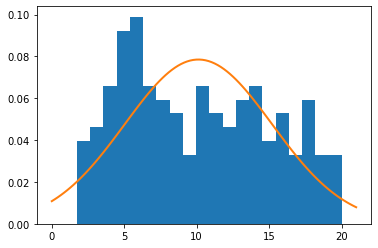

In [47]:
# каким тестом пользоваться, точным или асимптотическим?

plt.hist(x, density=True, bins=20)

xs = np.linspace(0,21,100)
pdf = stats.norm(x.mean(), x.std(ddof=1)).pdf(xs)
plt.plot(xs, pdf, lw=2);

In [49]:
# распределение не похоже на номральное, проверка выборки на нормальность с помощью колмагорова-смирнова

stats.kstest(x, 'norm', args=(df['RT'].mean(), df['RT'].std(ddof=1)))

KstestResult(statistic=0.10581791163988818, pvalue=0.045074232278964566)

In [50]:
# p_value - низкое
# т.к. выбросов нет, а распределение не нормальное, лучше воспользоваться асимптотическим

# Сравнить кровожадность
Правда ли, что женищины намного кровожаднее мужчин и жмут на кнопку гораздо быстрее?

In [53]:
men = df[df['GENDER'] == 1]['RT'].dropna().values
women = df[df['GENDER'] == 0]['RT'].dropna().values

In [52]:
men.mean(), women.mean()

(9.373347263157894, 10.50552123853211)

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_1 = \mu_2 \hspace{2mm} \text{Cкорость нажатия на кнопку одинаковая} \\
&H_1: \hspace{2mm} \mu_1 > \mu_2  \hspace{2mm} \text{Женщины жмут быстрее}
\end{aligned}
$$


In [57]:
# т.к. в данных нет нормальности => используется асимптотический тест
alpha = 0.05 
nx, ny = len(women), len(men)

diff = women.mean() - men.mean()
diff_std = np.sqrt((women.var(ddof=1)/nx) + (men.var(ddof=1)/ny))

z_obs = diff/diff_std
z_crit = stats.norm.ppf(1-alpha)

print(f'Наблюдаемое значение {z_obs:.5} меньше критического {z_crit:.5} => гипотеза не отвергается ' )

Наблюдаемое значение 1.376 меньше критического 1.6449 => гипотеза не отвергается 


In [59]:
# точный тест стьюдента, если бы было нормальное распределение
# тест уэлча для неизвестных диспресий

# Эмпатия
Перед экспериментом каждый участник проходил психологический тест. Для каждого человека рассчитывалось довольно большое число параметров, описывающих его психотип. Например, в колонках `EC` находится оценка способности человека к эмпатии [(Empathic concern),](https://en.wikipedia.org/wiki/Empathic_concern) в колонке `AE` находится оценка эмпатии человека к животным. 


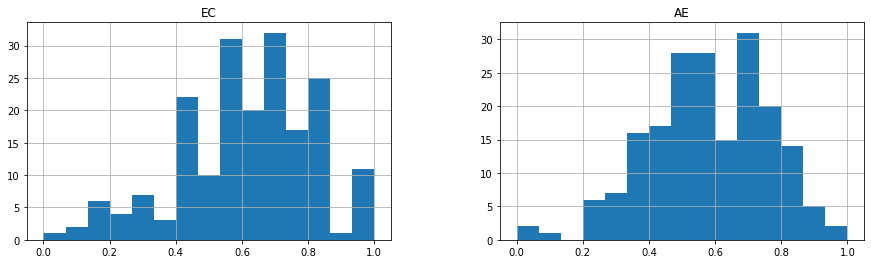

In [60]:
df['EC'] = (df['EC'] - df['EC'].min())/(df['EC'].max() - df['EC'].min())
df['AE'] = (df['AE'] - df['AE'].min())/(df['AE'].max() - df['AE'].min())

df[['EC', 'AE']].hist(bins=15, figsize=(15,4));

Правда ли, что неоднородность людей в плане их эмпатии к животным намного выше неоднородности в плане обычной эмпатии? 

$$
\begin{aligned}
&H_0: \hspace{2mm} \sigma^2_1 = \sigma^2_2 \hspace{2mm} \text{Неоднородность одинаковая} \\
&H_1: \hspace{2mm} \sigma^2_1 < \sigma^2_2  \hspace{2mm} \text{Неоднородность для животных выше}
\end{aligned}
$$

Распределения нормальные, можем использовать F-статистику. 

In [62]:
ec = df['EC'].dropna().values
ae = df['AE'].dropna().values

ec.mean(), ae.mean()

(0.6190814394131477, 0.5798980496933709)

In [63]:
ec.var(), ae.var()

(0.04247637731538298, 0.03204691694434707)

In [65]:
alpha = 0.05                            
nx, ny = ec.size, ae.size                
F_obs = ec.var()/ae.var()               
f_rv = stats.f(nx - 1, ny - 1) 
F_crit = f_rv.ppf(1 - alpha/2)    
print(f'Наблюдаемое значение {F_obs:.5} меньше критического {F_crit:.5} => нулевая гипотеза не отвергается')

Наблюдаемое значение 1.3254 меньше критического 1.3291 => нулевая гипотеза не отвергается
